<a href="https://colab.research.google.com/github/guillermohenrion/Intro-Python/blob/master/Exploraci%C3%B3n_con_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Covid-19: comparación entre paises 

Datos actualizados a diario tomados desde: [CSSEGISandData / COVID-19](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data)




In [5]:
# Recupero los datos
!wget https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
!wget https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
!wget https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv


--2020-05-02 15:38:35--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88599 (87K) [text/plain]
Saving to: ‘time_series_covid19_confirmed_global.csv.1’

time_series_covid19 100%[===================>]  86.52K  --.-KB/s    in 0.02s   

2020-05-02 15:38:35 (4.82 MB/s) - ‘time_series_covid19_confirmed_global.csv.1’ saved [88599/88599]

--2020-05-02 15:38:37--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133

In [6]:
# Leo, saco columnas no necesarias para el análisis, agrupo por país
import pandas as pd

df_covid = pd.read_csv('time_series_covid19_confirmed_global.csv')
df_covid_g = df_covid
df_covid=df_covid.drop(['Province/State',	'Lat',	'Long'], axis=1)
df_covid.head()
df_covid=df_covid.groupby('Country/Region').sum()
df_covid.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773,782
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745,745
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27,30


In [7]:
df_covid.describe()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,...,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,1.870000e+02,1.870000e+02,1.870000e+02,1.870000e+02
mean,2.967914,3.497326,5.032086,7.668449,11.326203,15.652406,29.828877,32.973262,44.032086,53.085561,64.374332,89.770053,106.315508,127.764706,147.780749,164.673797,183.909091,198.502674,214.705882,228.673797,239.582888,241.823529,322.823529,357.673797,369.144385,380.877005,391.754011,401.796791,404.486631,407.470588,410.796791,420.171123,422.235294,425.459893,429.978610,435.229947,442.491979,449.796791,459.951872,472.561497,...,2022.898396,2235.716578,2501.192513,2832.625668,3173.385027,3533.818182,3851.791444,4184.438503,4586.139037,4987.368984,5419.561497,5860.299465,6289.085561,6683.085561,7066.454545,7467.582888,7915.508021,8371.860963,8865.930481,9283.556150,9813.711230,10188.192513,10564.604278,10992.010695,11507.336898,11977.128342,12392.187166,12839.005348,13218.433155,13631.951872,14036.048128,14484.208556,14951.203209,15407.165775,15802.315508,16169.636364,1.656251e+04,1.696410e+04,1.741633e+04,1.788116e+04
std,40.071697,47.017656,67.271230,102.808451,151.725366,210.370186,402.833903,445.097602,595.295516,716.748552,869.503207,1216.048269,1441.715399,1733.558810,2006.538792,2236.665511,2494.267515,2691.994011,2912.467066,3097.091222,3245.682014,3272.950574,4379.793170,4852.400928,5002.659915,5156.212924,5296.684930,5426.633538,5456.477098,5489.942018,5524.486945,5630.542839,5632.064922,5648.098630,5685.626627,5715.884066,5748.080270,5772.931290,5805.984979,5850.182899,...,9042.680916,9724.853762,10643.848655,11902.880377,13227.916227,14697.027155,16082.579887,17601.645226,19479.335154,21357.566261,23524.900650,25815.441776,28186.731415,30218.834566,32316.332001,34523.207207,36865.577377,39346.003320,41843.182976,44056.498803,46468.169409,48336.026448,50316.798301,52456.139259,54935.881775,57332.153584,59625.929200,61702.614655,63572.829203,65623.203126,67699.531391,69853.968118,72291.378588,74689.347081,76708.015080,78403.643289,8.023487e+04,8.222966e+04,8.441411e+04,8.688918e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

[]

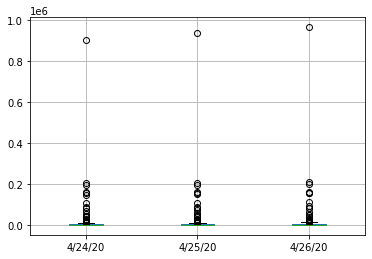

In [8]:
df_covid.boxplot(column=['4/24/20'	,'4/25/20'	,'4/26/20']).plot()

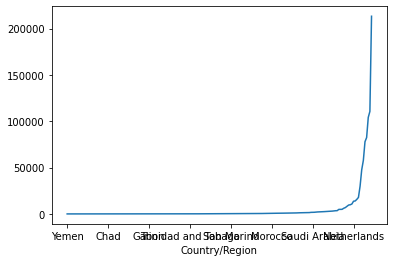

In [9]:
dfs=df_covid.sort_values(by=df_covid.columns[70])
dfs[df_covid.columns[70]].plot()


In [10]:
#Traspongo 
df_covid_t=df_covid.transpose()
df_covid_t.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,7,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,2,0,0,0,0,0


,Argentina
count,101.000000
mean,877.594059
std,1330.186597
min,0.000000
25%,0.000000
50%,19.000000
75%,1554.000000
max,4532.000000


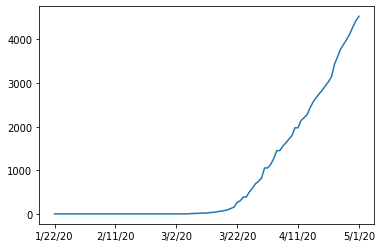

In [11]:
df_covid_t['Argentina'].plot()
pd.DataFrame(df_covid_t['Argentina']).describe()


[]

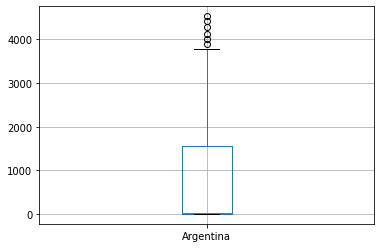

In [12]:
pd.DataFrame(df_covid_t['Argentina']).boxplot(column='Argentina').plot()

In [28]:
# Tomo data desde t0 para algunos paies
#df_covid_t0.head()
df_covid_t0=df_covid_t[1:]

df_covid_t0_Argentina=df_covid_t0["Argentina"]
df_covid_t0_Argentina=df_covid_t0_Argentina[df_covid_t0_Argentina>0]

df_covid_t0_Italia=df_covid_t0["Italy"]
df_covid_t0_Italia=df_covid_t0_Italia[df_covid_t0_Italia>0]

df_covid_t0_Chile=df_covid_t0["Chile"]
df_covid_t0_Chile=df_covid_t0_Chile[df_covid_t0_Chile>0]

df_covid_t0_Australia=df_covid_t0["Australia"]
df_covid_t0_Australia=df_covid_t0_Chile[df_covid_t0_Australia>0]

df_covid_t0_Spain=df_covid_t0["Spain"]
df_covid_t0_Spain=df_covid_t0_Spain[df_covid_t0_Spain>0]

df_covid_t0_Argentina.head()

3/3/20    1
3/4/20    1
3/5/20    1
3/6/20    2
3/7/20    8
Name: Argentina, dtype: int64

In [29]:
#Con Plotly
import plotly.express as px

cntArgentina=df_covid_t0_Argentina.count()
colA=['Argentina']*cntArgentina
df_covid_t0_Argentina2=pd.DataFrame(df_covid_t0_Argentina)
df_covid_t0_Argentina2.insert(1, "Pais", colA, True)

cntChile=df_covid_t0_Chile.count()
colC=['Chile']*cntChile
df_covid_t0_Chile2=pd.DataFrame(df_covid_t0_Chile)
df_covid_t0_Chile2.insert(1, "Pais", colC, True)

cntItalia=df_covid_t0_Italia.count()
colI=['Italia']*cntItalia
df_covid_t0_Italia2=pd.DataFrame(df_covid_t0_Italia)
df_covid_t0_Italia2.insert(1, "Pais", colI, True)

cntSpain=df_covid_t0_Spain.count()
colS=['España']*cntSpain
df_covid_t0_Spain2=pd.DataFrame(df_covid_t0_Spain)
df_covid_t0_Spain2.insert(1, "Pais", colS, True)

df_covid_t0_Argentina2.columns=['Confirmados', 'Pais']
df_covid_t0_Chile2.columns=['Confirmados', 'Pais']
df_covid_t0_Italia2.columns=['Confirmados', 'Pais']
df_covid_t0_Spain2.columns=['Confirmados', 'Pais']

df2=pd.concat([
    df_covid_t0_Argentina2,df_covid_t0_Chile2, df_covid_t0_Italia2, df_covid_t0_Spain2
],ignore_index=True).drop_duplicates().reset_index(drop=True)

fig = px.line(df2,  y="Confirmados", color='Pais', title="Confirmados por pais (ref.T0)")
fig.show()

In [30]:
#Forma genérica

dfg=pd.DataFrame()
df_covid_t0_p={}
cp = ['Argentina', 'Chile', 'Spain', 'Italy', 'China', 'Brazil', 'US', 'Australia']
#for c in df_covid_t.columns: # Selecciono algunos, porque con todos no se entiende em gráfico
for c in cp:
  dfp=df_covid_t0[c]
  dfp=dfp[dfp>0]
  cnp=dfp.count()
  colp=[c]*cnp
  dfp2=pd.DataFrame(dfp)
  dfp2.insert(1, "Pais", colp, True)
  dfp2.columns=['Confirmados', 'Pais']
  dfg=pd.concat([dfg ,dfp2],ignore_index=True).drop_duplicates().reset_index(drop=True)

fig = px.line(dfg,  y="Confirmados", color='Pais', title="Confirmados por pais (ref.T0)")
fig.show()

In [31]:
#Confirmados a la fecha
df_covid.head()
c=df_covid_g.columns
l=len(c)
dfc=df_covid_g.drop(c[4:l-1], axis=1)
dfc.head()
dfc.columns=['Province/State'	,'Country/Region'	,'Lat'	,'Long','Confirmados']
dfc.head()


,Province/State,Country/Region,Lat,Long,Confirmados
0,NaN,Afghanistan,33.0000,65.0000,2335
1,NaN,Albania,41.1533,20.1683,782
2,NaN,Algeria,28.0339,1.6596,4154
3,NaN,Andorra,42.5063,1.5218,745
4,NaN,Angola,-11.2027,17.8739,30


In [32]:
from geopy.geocoders import Nominatim
import folium
import base64
import io

mapa = folium.Map(location=(-34.6131516,	 -58.3772316), zoom_start=4)

for index,row in dfc.iterrows(): 
  icon_url = 'https://upload.wikimedia.org/wikipedia/commons/9/9e/WX_circle_red.png'

  icon = folium.features.CustomIcon(icon_url,icon_size=(max(row['Confirmados']/10000,5), max(row['Confirmados']/10000, 5)))  # Creating a custom Icon

  folium.Marker(location=(row['Lat'],row['Long']),  icon=icon, tooltip=row['Confirmados']).add_to(mapa)

display(mapa)
